In [1]:
import csv
import math
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
import numpy as np
import os
%matplotlib inline
import pandas as pd
import sklearn
import shap
import time
from sklearn.tree import DecisionTreeClassifier
import xgboost
import shap


from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from shap import TreeExplainer
from shap import summary_plot

In [2]:
import json
with open('GA_output_ET.json', 'r') as fp:
    feature_list = json.load(fp)

In [3]:
import warnings
warnings.filterwarnings("ignore")

# create binary datasets

In [4]:
def folder(f_name): #this function creates a folder.
    try:
        if not os.path.exists(f_name):
            os.makedirs(f_name)
    except OSError:
        print ("The folder could not be created!")

In [5]:
folder("results")

In [6]:
def find_the_way(path,file_format):
    files_add = []
    # r=root, d=directories, f = files
    for r, d, f in os.walk(path):
        for file in f:
            if file_format in file:
                files_add.append(os.path.join(r, file))  
    return files_add

files_add=find_the_way("./N/",".csv")
files_add

[]

In [7]:
file_list={"SYN":['./INPUT/SM/DoS-SYN-1.csv','./INPUT/SM/DoS-SYN-6.csv'],
"HTTP":['./INPUT/SM/MB-HTTP-4.csv', './INPUT/VAL/Maze_HTTP.csv'],
"ACK":['./INPUT/SM/MB-ACK-4.csv','./INPUT/VAL/Maze_ACK.csv'],
"UDP":['./INPUT/SM/MB-UDP-4.csv','./INPUT/VAL/Flood-Globe_Lamp-UDP-GlobeLampUDPFlood_1_SM+.csv'],
"ARP":['./INPUT/SM/MitM-ARP-6.csv','./INPUT/SM/MitM-ARP-5.csv'],
"SP":['./INPUT/SM/Scan-Port-3.csv','./INPUT/VAL/Edge-IIoTset_Port_Scan.csv'],
"BF":['./INPUT/SM/MB-BF-5.csv','./INPUT/VAL/Edge_BF.csv'],
"OS":['./INPUT/SM/Scan-OS-3.csv', './INPUT/VAL/BoT-IoT_OSScan.csv'],
"SCHD":['./INPUT/SM/Scan-HDis-3.csv','./INPUT/SM/Scan-HDis-5.csv'],
"MHDis":['./INPUT/SM/MB-HDis-3.csv','./INPUT/SM/MB-HDis-4.csv']}

a={'./INPUT/SM/DoS-SYN-1.csv':"SYN",
'./INPUT/SM/MB-HTTP-4.csv':"HTTP",
'./INPUT/SM/MB-ACK-4.csv':"ACK",
'./INPUT/SM/MB-UDP-4.csv':"UDP",
'./INPUT/SM/MitM-ARP-6.csv':"ARP",
'./INPUT/SM/H-Scan-Port-3.csv':"SP",
'./INPUT/SM/MB-BF-5.csv':"BF",
'./INPUT/SM/Scan-OS-3.csv':"OS",  
'./INPUT/SM/Scan-HDis-3.csv':"SCHD",
'./INPUT/SM/MB-HDis-3.csv':"MHDis"}

b={"SYN":['./INPUT/SM/DoS-SYN-1.csv','./INPUT/SM/DoS-SYN-2.csv'],
"HTTP":['./INPUT/SM/MB-HTTP-4.csv','./INPUT/SM/MB-HTTP-1.csv'],
"ACK":['./INPUT/SM/MB-ACK-4.csv','./INPUT/SM/MB-ACK-1.csv'],
"UDP":['./INPUT/SM/MB-UDP-4.csv','./INPUT/SM/MB-UDP-1.csv'],
"ARP":['./INPUT/SM/MitM-ARP-6.csv','./INPUT/SM/MitM-ARP-4.csv'],  
"SP":['./INPUT/SM/Scan-Port-3.csv','./INPUT/SM/H-Scan-Port-4.csv'],
"BF":['./INPUT/SM/MB-BF-5.csv','./INPUT/SM/MB-BF-3.csv'],
"OS":['./INPUT/SM/Scan-OS-3.csv','./INPUT/SM/Scan-OS-6.csv'],
"SCHD":['./INPUT/SM/Scan-HDis-3.csv','./INPUT/SM/MB-HDis-2.csv'],
"MHDis":['./INPUT/SM/MB-HDis-3.csv','./INPUT/SM/Scan-HDis-4.csv' ]}

c={'SYN': ['./INPUT/SM/DoS-SYN-1.csv',  './INPUT/TEST/small_Edge_IIoT_DDoS_TCP_SYN_Flood_Attacks_00000_20211124180237._SM.csv'],
 'HTTP': ['./INPUT/SM/MB-HTTP-4.csv',  './INPUT/TEST/NetatmoCamHTTPFlood_1_SM.csv'],
'ACK': ['./INPUT/SM/MB-ACK-4.csv',  './INPUT/TEST/NetatmoCamTCPFlood_3_SM.csv'],
 'UDP': ['./INPUT/SM/MB-UDP-4.csv',  './INPUT/TEST/Bot_IoT_UDP_DDoS_00001._SM.csv'],
 'ARP': ['./INPUT/SM/MitM-ARP-6.csv',   './INPUT/TEST/Kitsune_ARP_MitM._SM.csv'],
 'SP': ['./INPUT/SM/Scan-Port-3.csv', './INPUT/TEST/IoT_ENV_[Port_scan]Google_Home_Mini_SM.csv'],
 'BF': ['./INPUT/SM/MB-BF-5.csv',  './INPUT/TEST/AmcrestCamBruteForce_1_SM.csv'],
 'OS': ['./INPUT/SM/Scan-OS-3.csv',  './INPUT/TEST/IoT_ENV_[OS_Service_Detection]Google_Home_Mini_SM.csv'],
"SCHD":['./INPUT/SM/Scan-HDis-3.csv','./INPUT/SM/MB-HDis-3.csv'],
"MHDis":['./INPUT/SM/MB-HDis-3.csv','./INPUT/SM/Scan-HDis-3.csv' ]}

In [8]:

final={}
for i in a:
    print(i)
    final[i]=f"{a[i]}1"
    final[b[a[i]][1]]=f"{a[i]}2"
    final[c[a[i]][1]]=f"{a[i]}3"

./INPUT/SM/DoS-SYN-1.csv
./INPUT/SM/MB-HTTP-4.csv
./INPUT/SM/MB-ACK-4.csv
./INPUT/SM/MB-UDP-4.csv
./INPUT/SM/MitM-ARP-6.csv
./INPUT/SM/H-Scan-Port-3.csv
./INPUT/SM/MB-BF-5.csv
./INPUT/SM/Scan-OS-3.csv
./INPUT/SM/Scan-HDis-3.csv
./INPUT/SM/MB-HDis-3.csv


In [9]:
file_list={'./INPUT/SM/DoS-SYN-1.csv': 'SYN1',
 './INPUT/SM/MB-HTTP-4.csv': 'HTTP1',
 './INPUT/SM/MB-ACK-4.csv': 'ACK1',
 './INPUT/SM/MB-UDP-4.csv': 'UDP1',
 './INPUT/SM/MitM-ARP-6.csv': 'ARP1',
 './INPUT/SM/Scan-Port-3.csv': 'SP1',
 './INPUT/SM/MB-BF-5.csv': 'BF1',
 './INPUT/SM/Scan-OS-3.csv': 'OS1',
 './INPUT/SM/Scan-HDis-3.csv': 'MHDis3',
 './INPUT/SM/MB-HDis-3.csv': 'MHDis1',
 './INPUT/SM/DoS-SYN-2.csv': 'SYN2',
 './INPUT/SM/MB-HTTP-1.csv': 'HTTP2',
 './INPUT/SM/MB-ACK-1.csv': 'ACK2',
 './INPUT/SM/MB-UDP-1.csv': 'UDP2',
 './INPUT/SM/MitM-ARP-4.csv': 'ARP2',
 './INPUT/SM/Scan-Port-4.csv': 'SP2',
 './INPUT/SM/MB-BF-3.csv': 'BF2',
 './INPUT/SM/Scan-OS-6.csv': 'OS2',
 './INPUT/SM/MB-HDis-2.csv': 'SCHD2',
 './INPUT/SM/Scan-HDis-4.csv': 'MHDis2',
 './INPUT/TEST/small_Edge_IIoT_DDoS_TCP_SYN_Flood_Attacks_00000_20211124180237._SW.csv': 'SYN3',
 './INPUT/TEST/NetatmoCamHTTPFlood_1_SW.csv': 'HTTP3',
 './INPUT/TEST/NetatmoCamTCPFlood_3_SW.csv': 'ACK3',
 './INPUT/TEST/Bot_IoT_UDP_DDoS_00001._SW.csv': 'UDP3',
 './INPUT/TEST/Kitsune_ARP_MitM._SW.csv': 'ARP3',
 './INPUT/TEST/IoT_ENV_[Port_scan]Google_Home_Mini_SW.csv': 'SP3',
 './INPUT/TEST/AmcrestCamBruteForce_1_SW.csv': 'BF3',
 './INPUT/TEST/IoT_ENV_[OS_Service_Detection]Google_Home_Mini_SW.csv': 'OS3'}

./INPUT/SM/DoS-SYN-1.csv


100%|===================| 19958/20000 [00:22<00:00]        

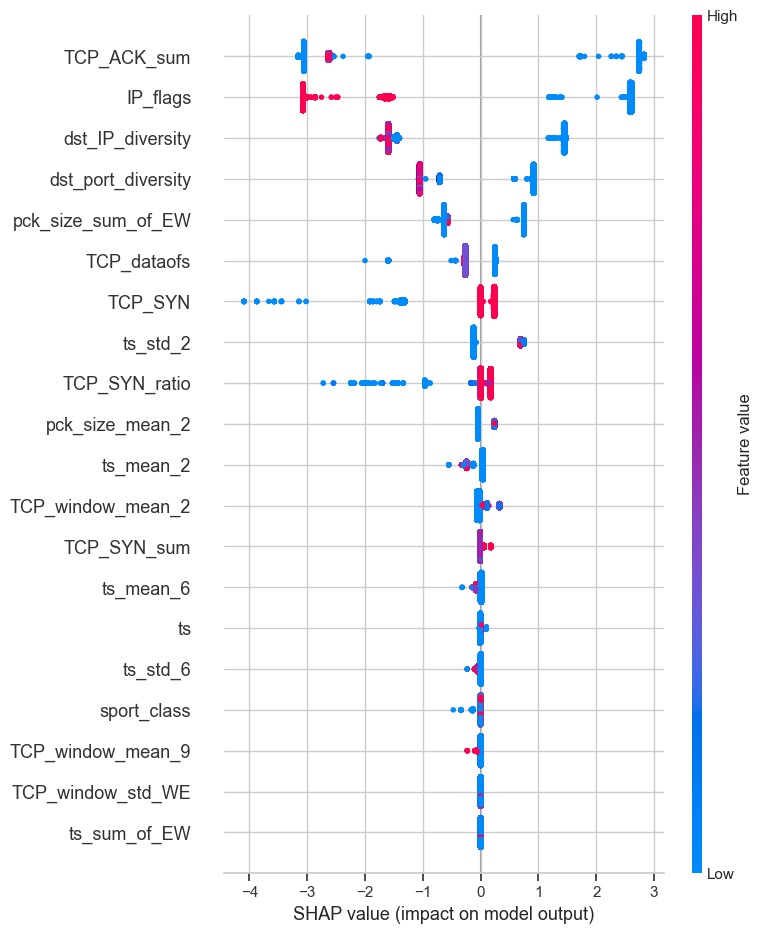

./INPUT/SM/MB-HTTP-4.csv


 98%|===================| 19578/20000 [00:11<00:00]       

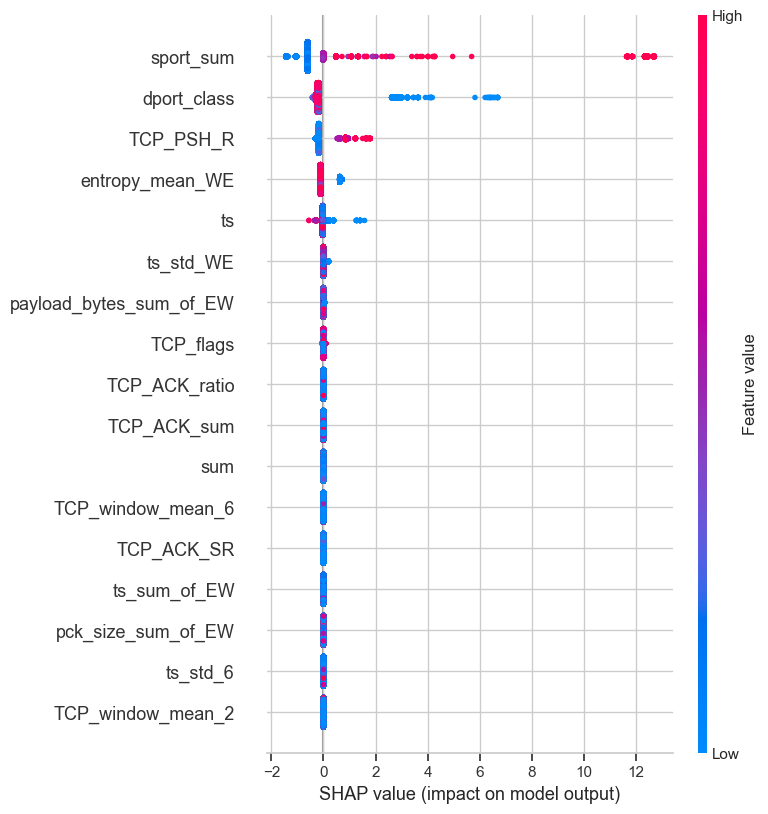

./INPUT/SM/MB-ACK-4.csv


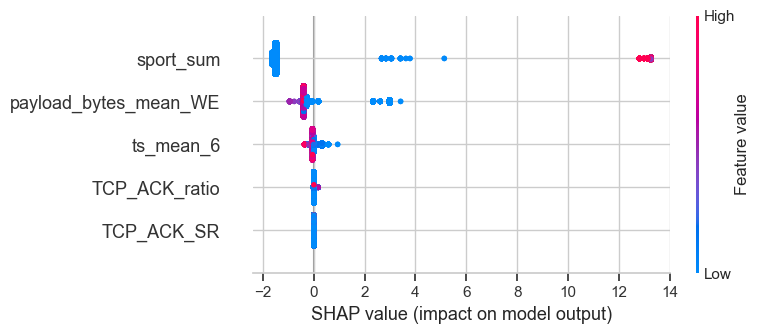

./INPUT/SM/MB-UDP-4.csv


 99%|===================| 19707/20000 [00:26<00:00]        

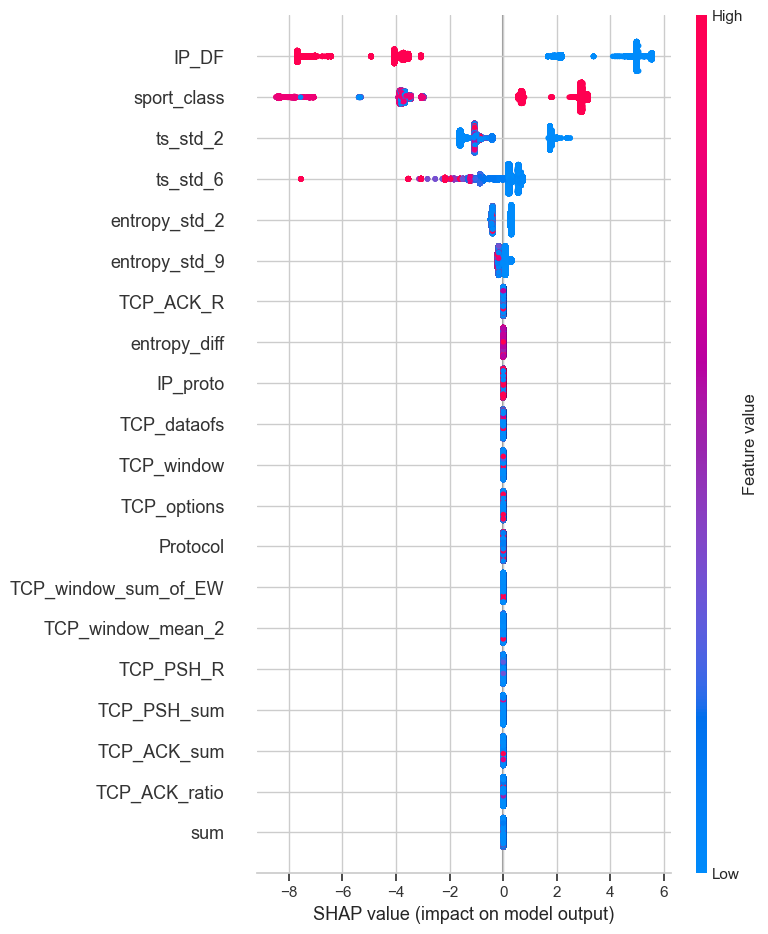

./INPUT/SM/MitM-ARP-6.csv


 99%|===================| 19868/20000 [01:55<00:00]        

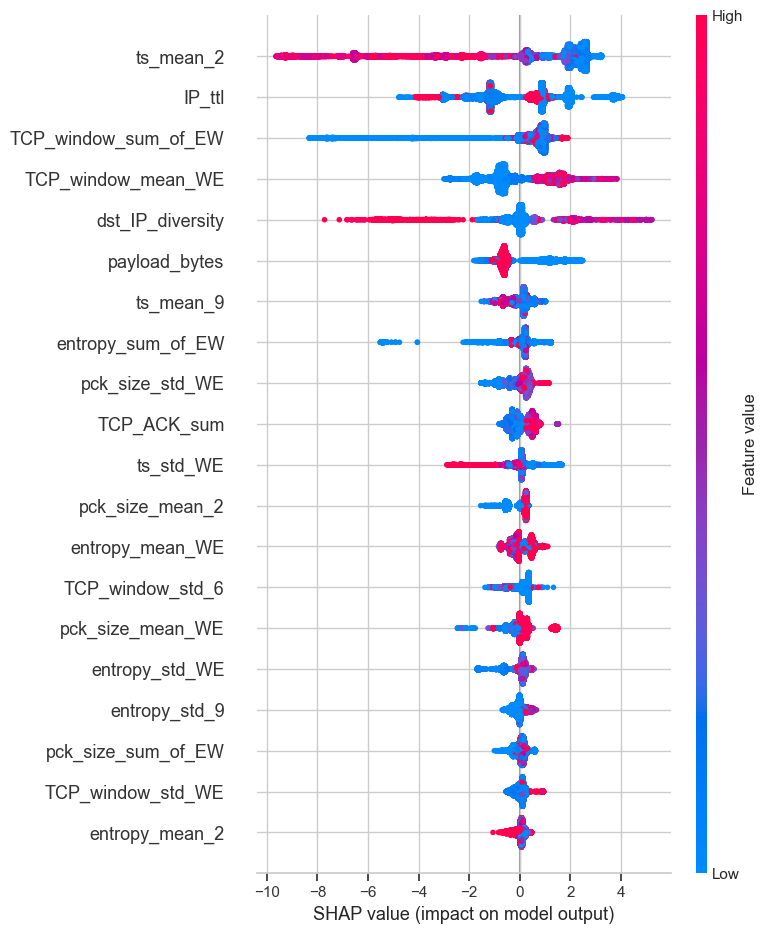

./INPUT/SM/Scan-Port-3.csv


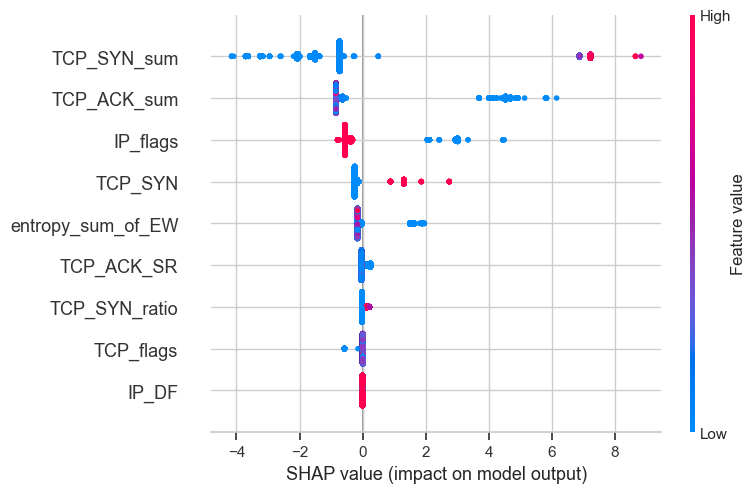

./INPUT/SM/MB-BF-5.csv


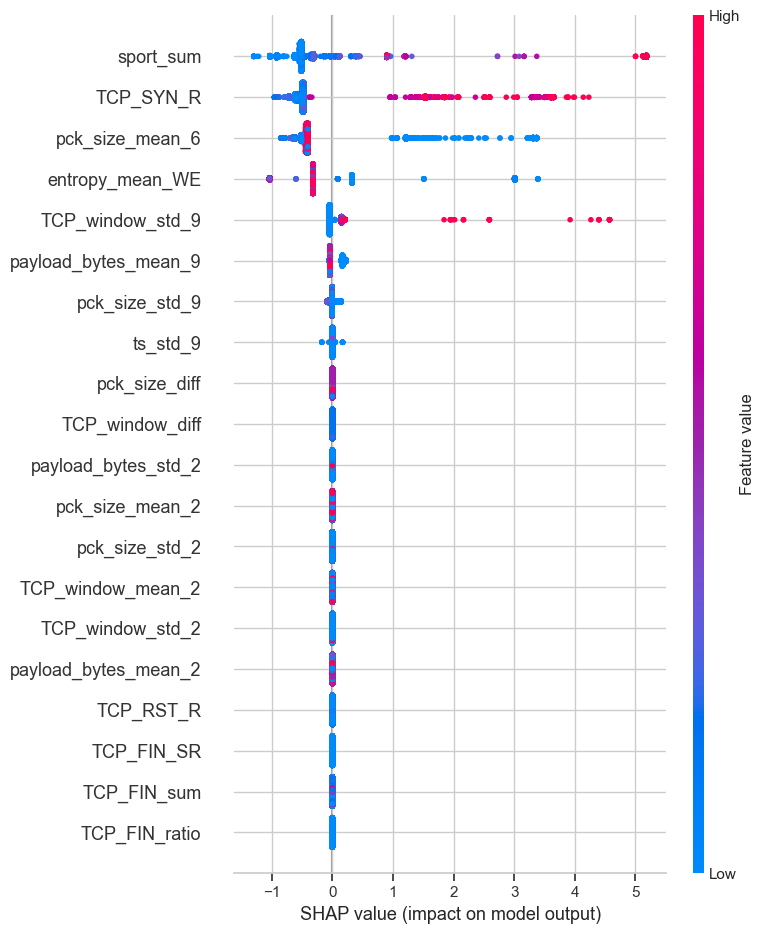

./INPUT/SM/Scan-OS-3.csv


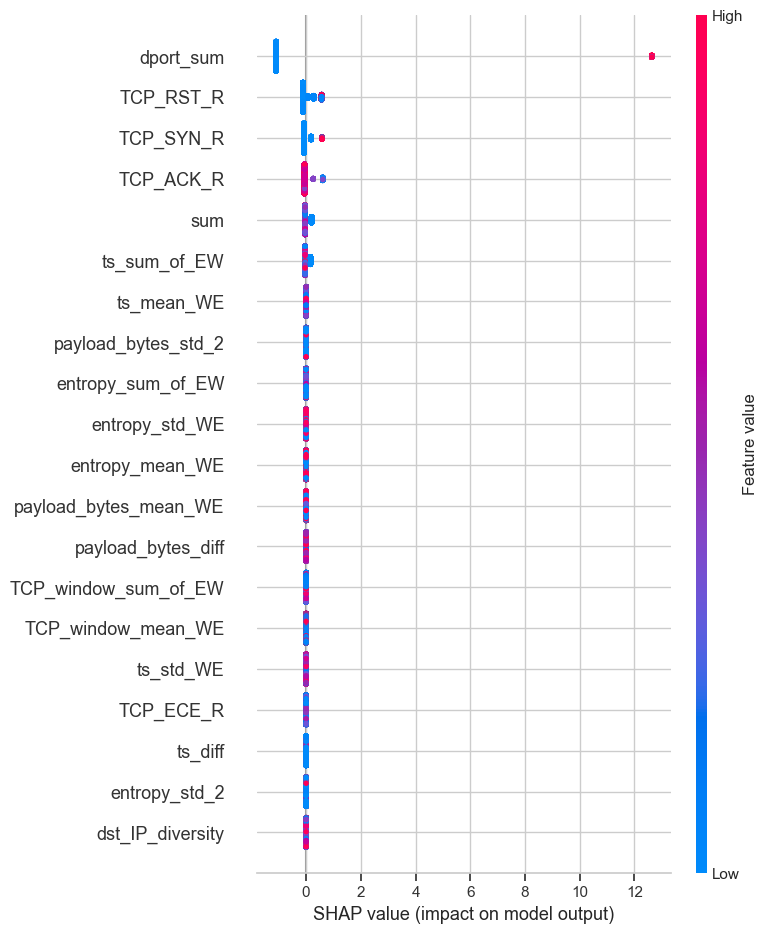

./INPUT/SM/Scan-HDis-3.csv


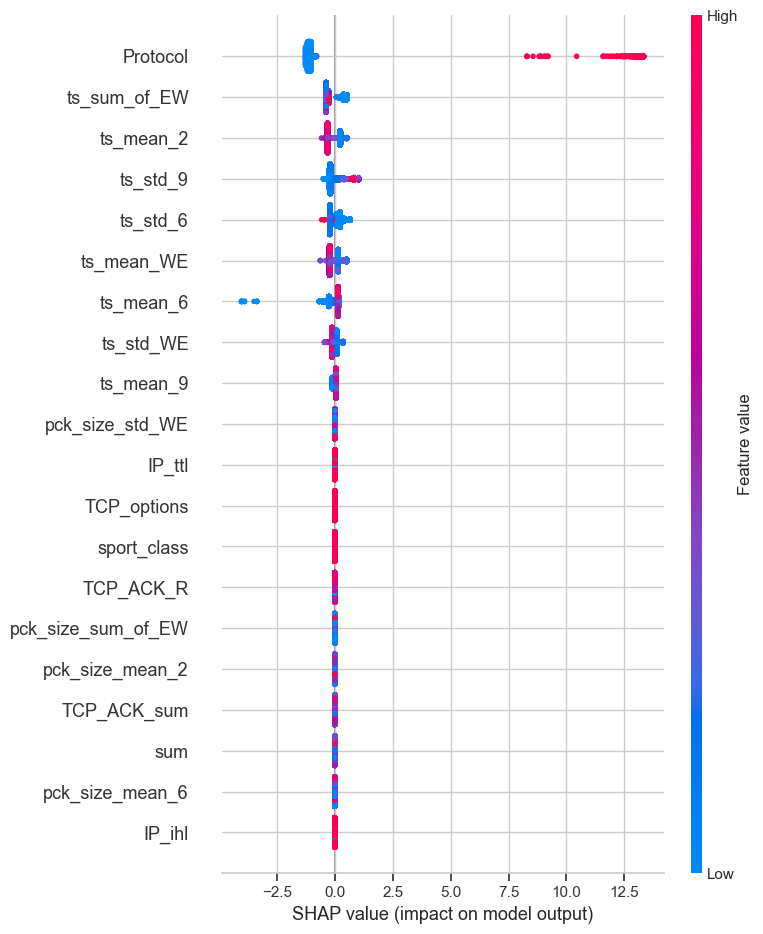

./INPUT/SM/MB-HDis-3.csv


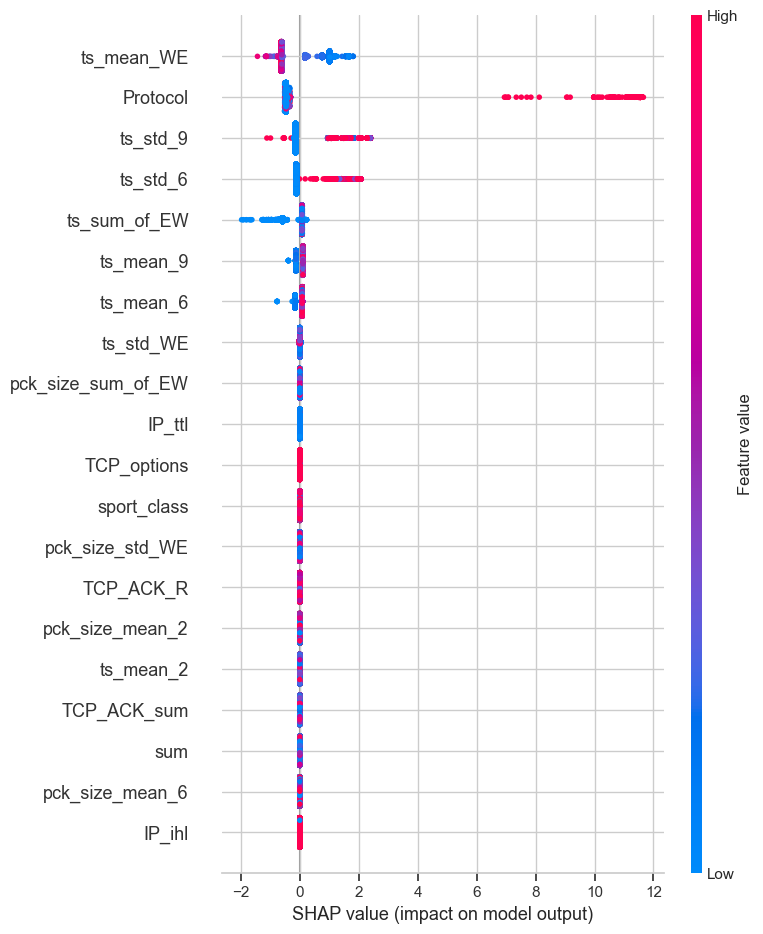

./INPUT/SM/DoS-SYN-2.csv


 97%|=================== | 19313/20000 [00:23<00:00]       

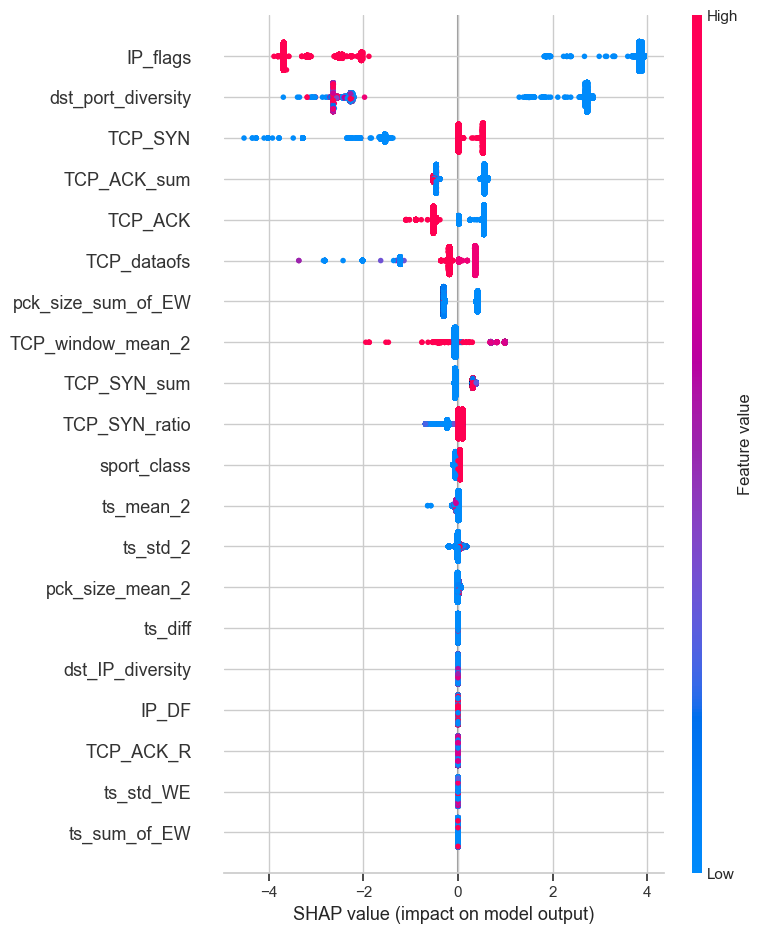

./INPUT/SM/MB-HTTP-1.csv


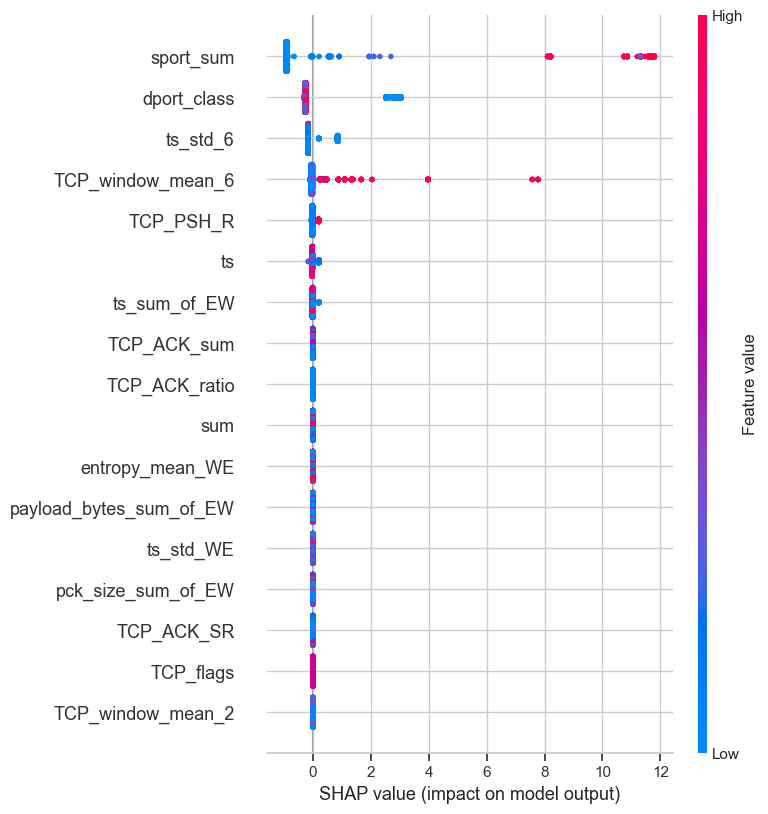

./INPUT/SM/MB-ACK-1.csv


 96%|=================== | 19262/20000 [00:18<00:00]       

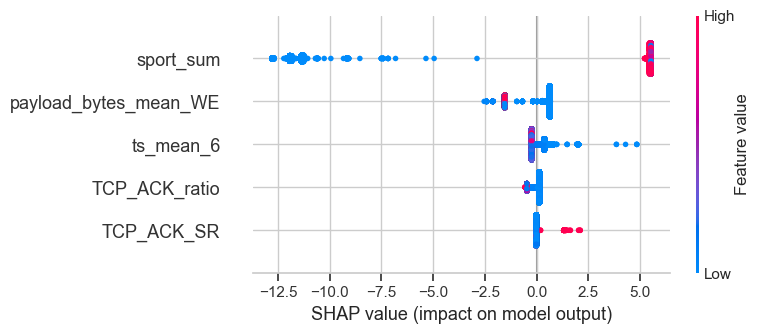

./INPUT/SM/MB-UDP-1.csv


 98%|===================| 19563/20000 [00:18<00:00]        

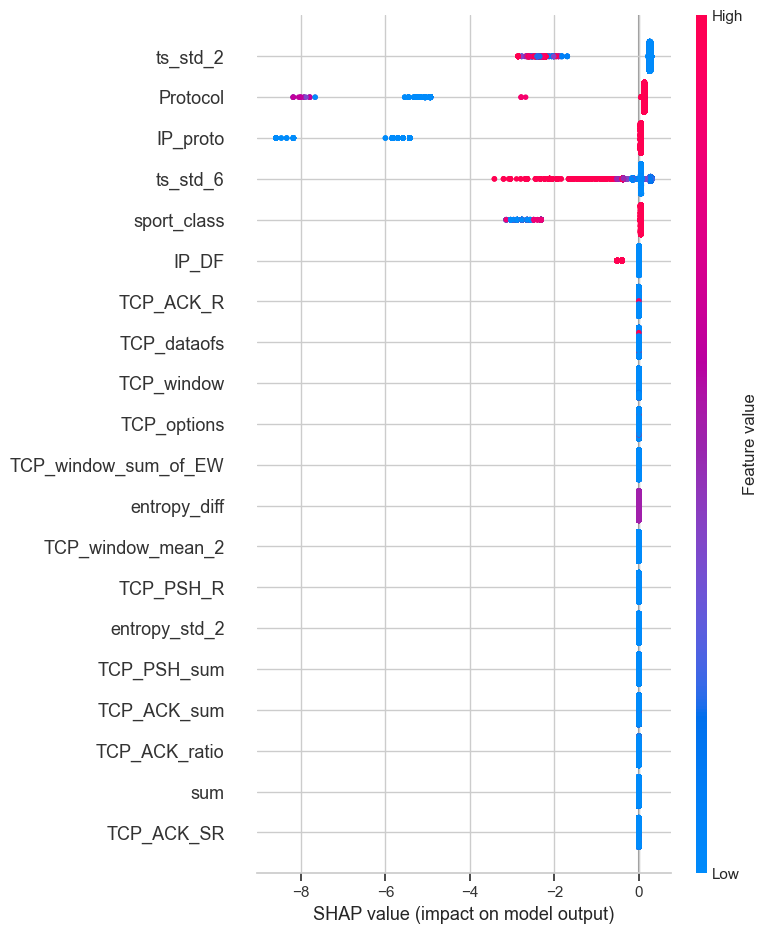

./INPUT/SM/MitM-ARP-4.csv


 99%|===================| 19772/19914 [01:50<00:00]        

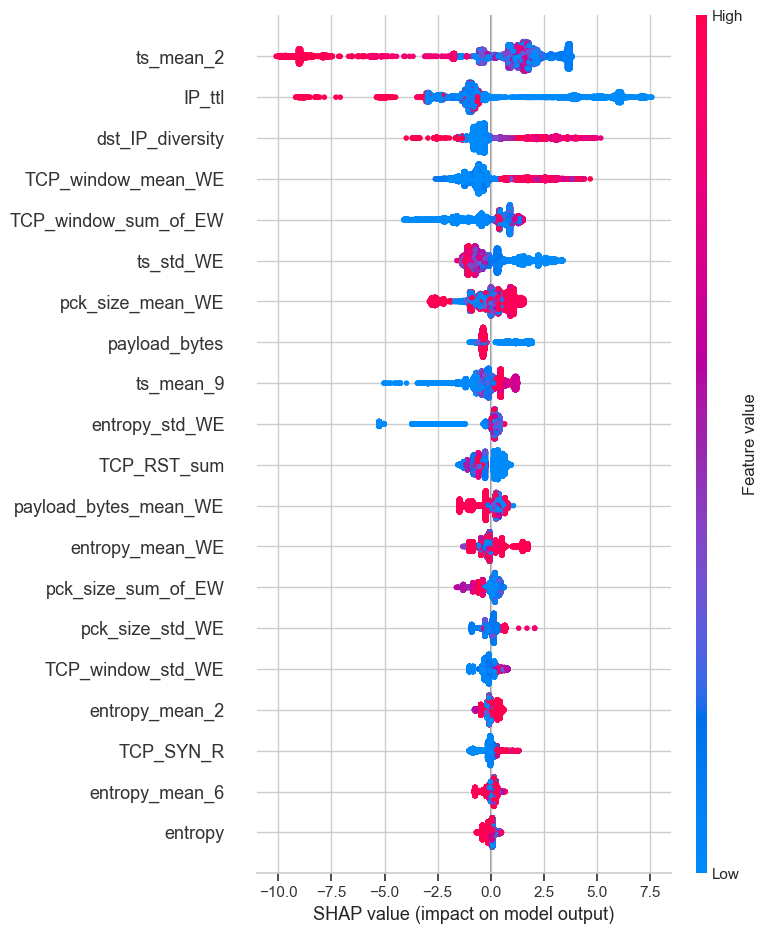

./INPUT/SM/Scan-Port-4.csv


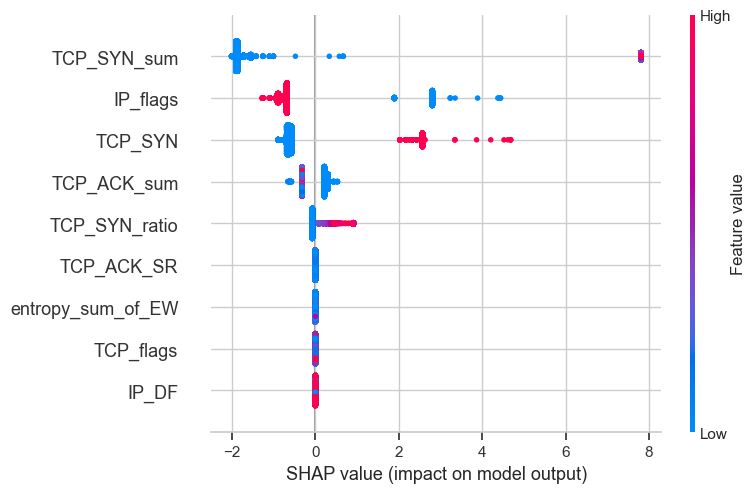

./INPUT/SM/MB-BF-3.csv


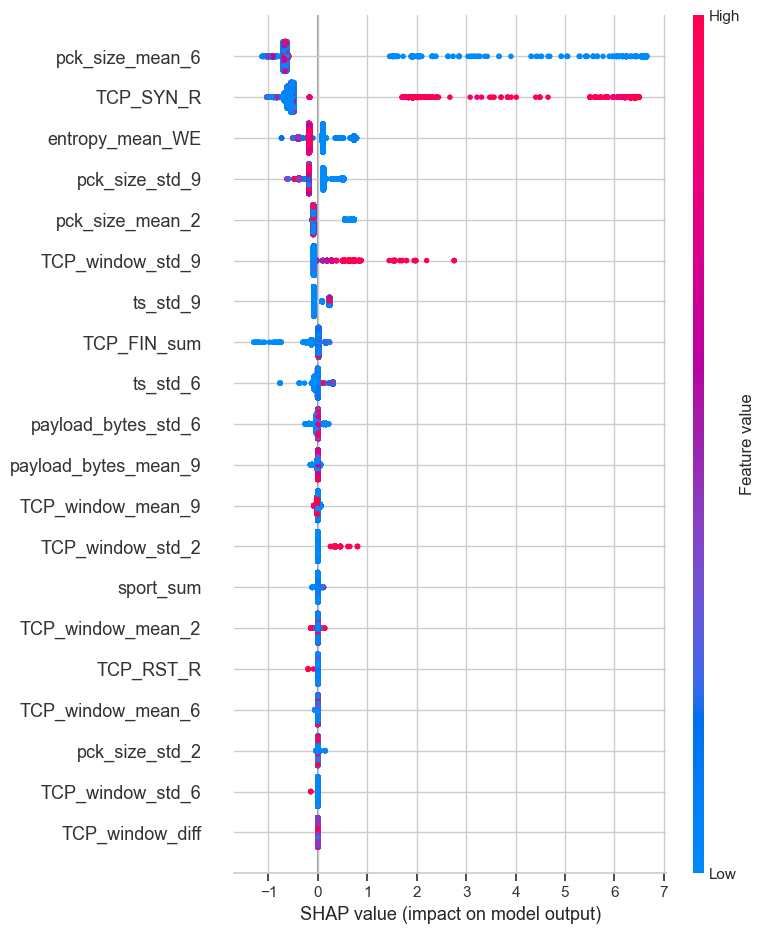

./INPUT/SM/Scan-OS-6.csv


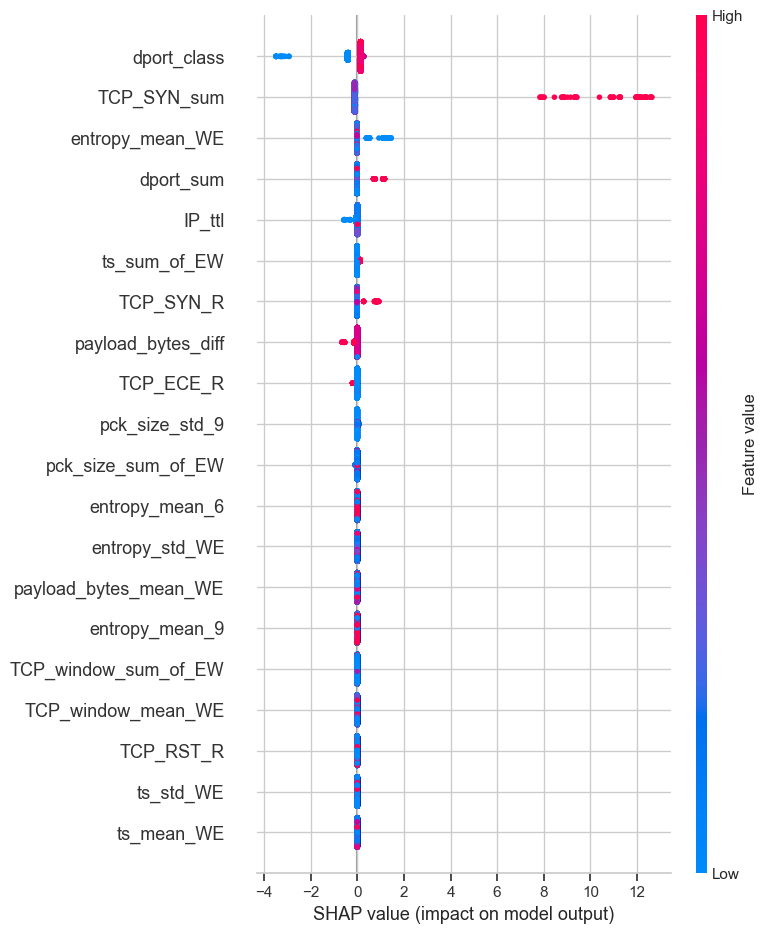

./INPUT/SM/MB-HDis-2.csv


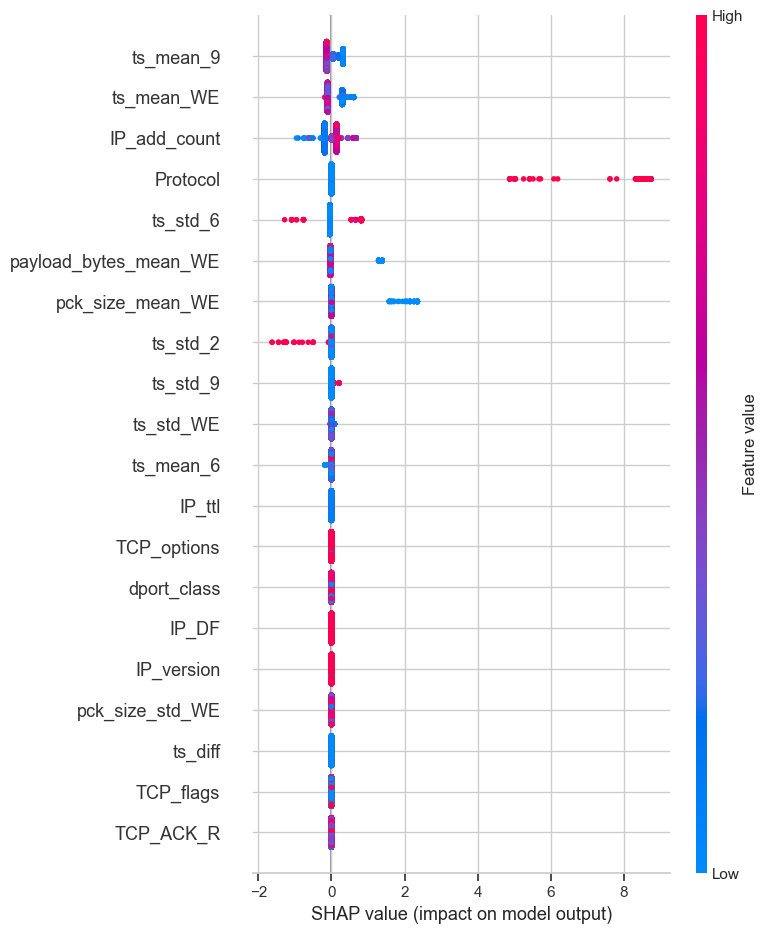

./INPUT/SM/Scan-HDis-4.csv


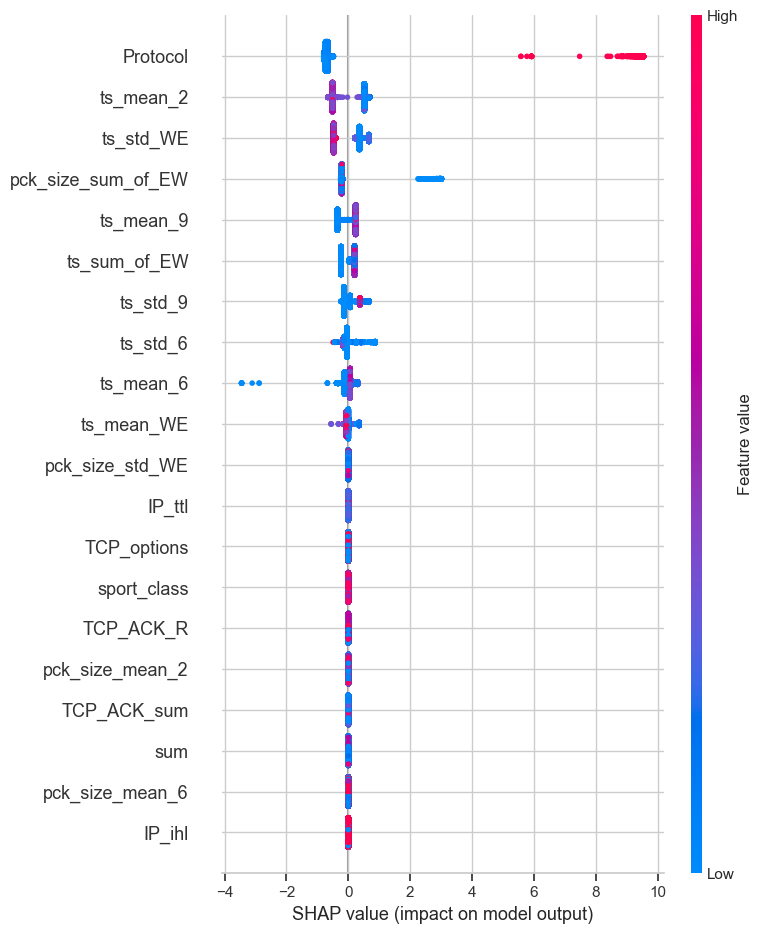

./INPUT/TEST/small_Edge_IIoT_DDoS_TCP_SYN_Flood_Attacks_00000_20211124180237._SW.csv


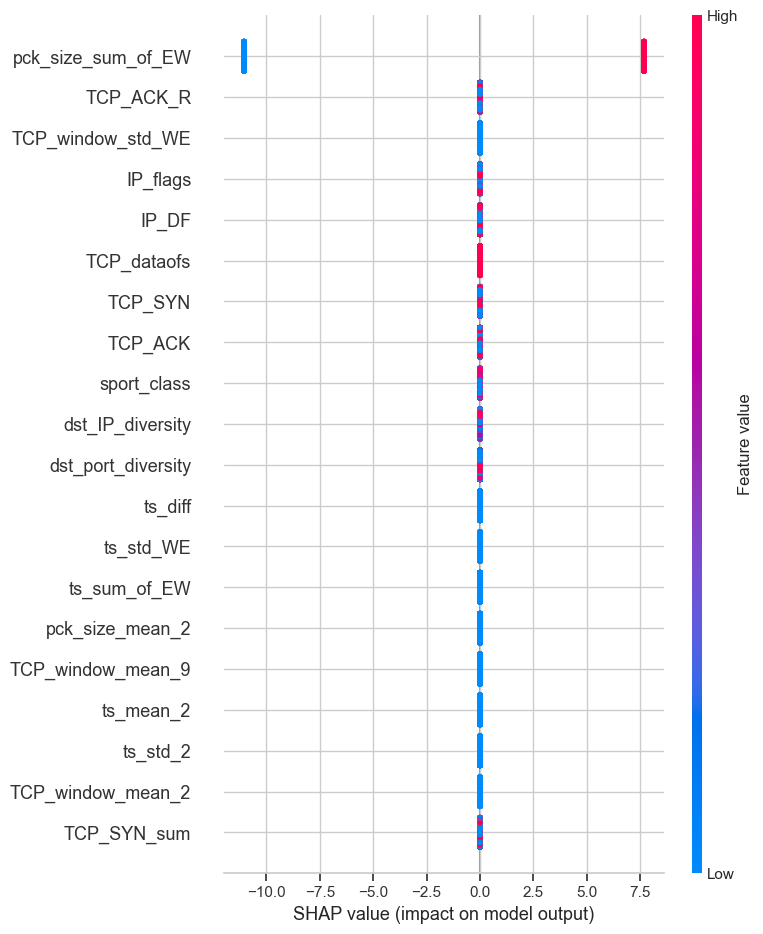

./INPUT/TEST/NetatmoCamHTTPFlood_1_SW.csv


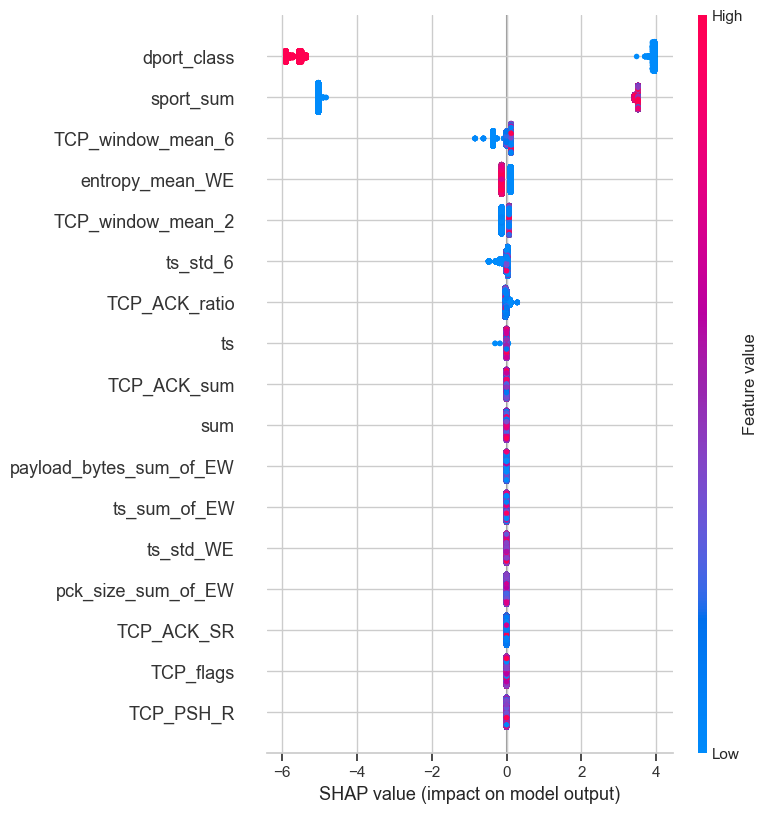

./INPUT/TEST/NetatmoCamTCPFlood_3_SW.csv


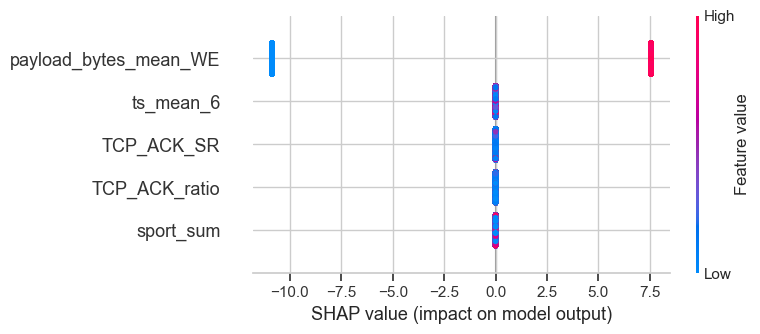

./INPUT/TEST/Bot_IoT_UDP_DDoS_00001._SW.csv


 99%|===================| 19874/20000 [00:18<00:00]        

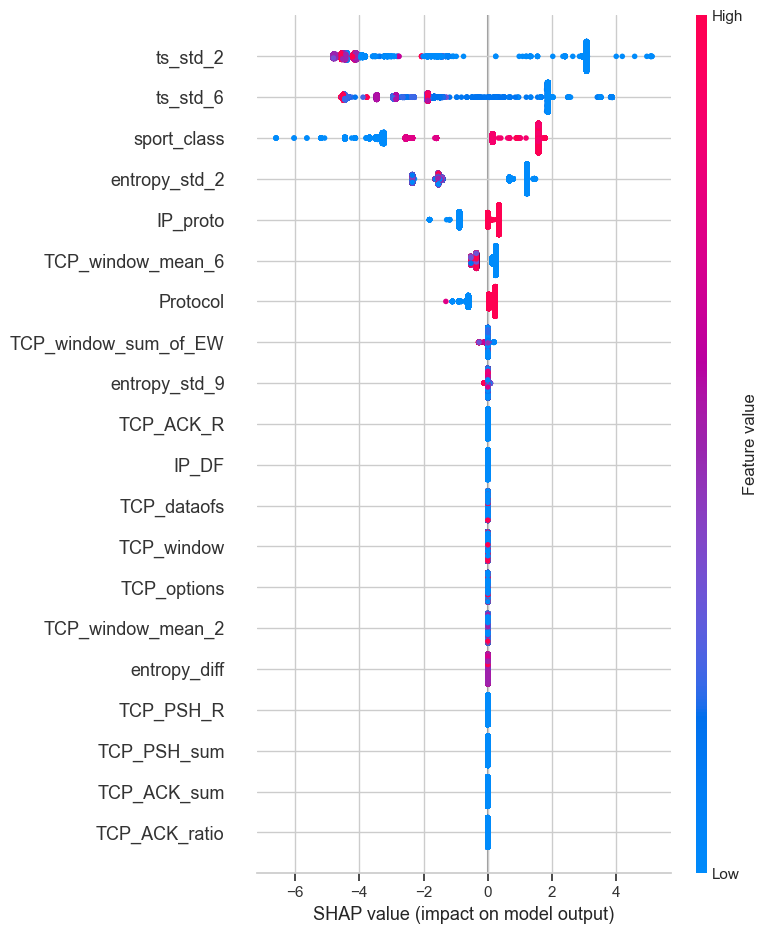

./INPUT/TEST/Kitsune_ARP_MitM._SW.csv


 97%|=================== | 19339/20000 [00:20<00:00]       

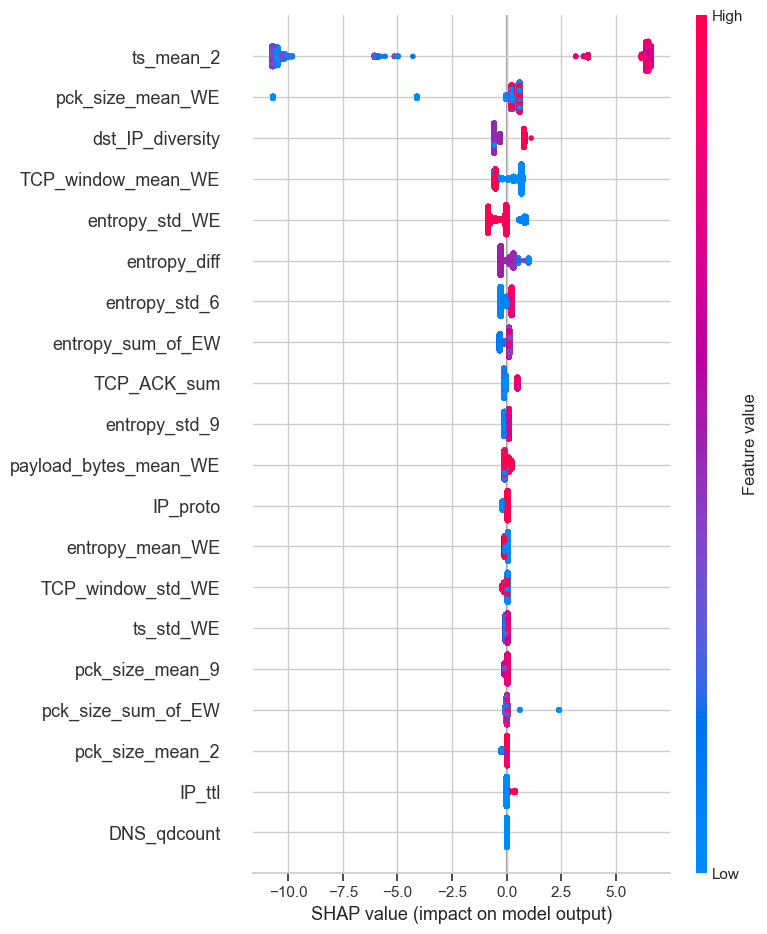

./INPUT/TEST/IoT_ENV_[Port_scan]Google_Home_Mini_SW.csv


 99%|===================| 8773/8866 [00:12<00:00]        

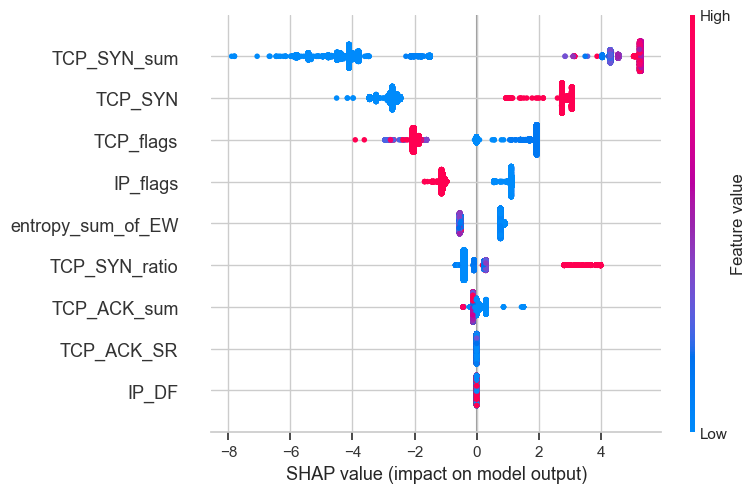

./INPUT/TEST/AmcrestCamBruteForce_1_SW.csv


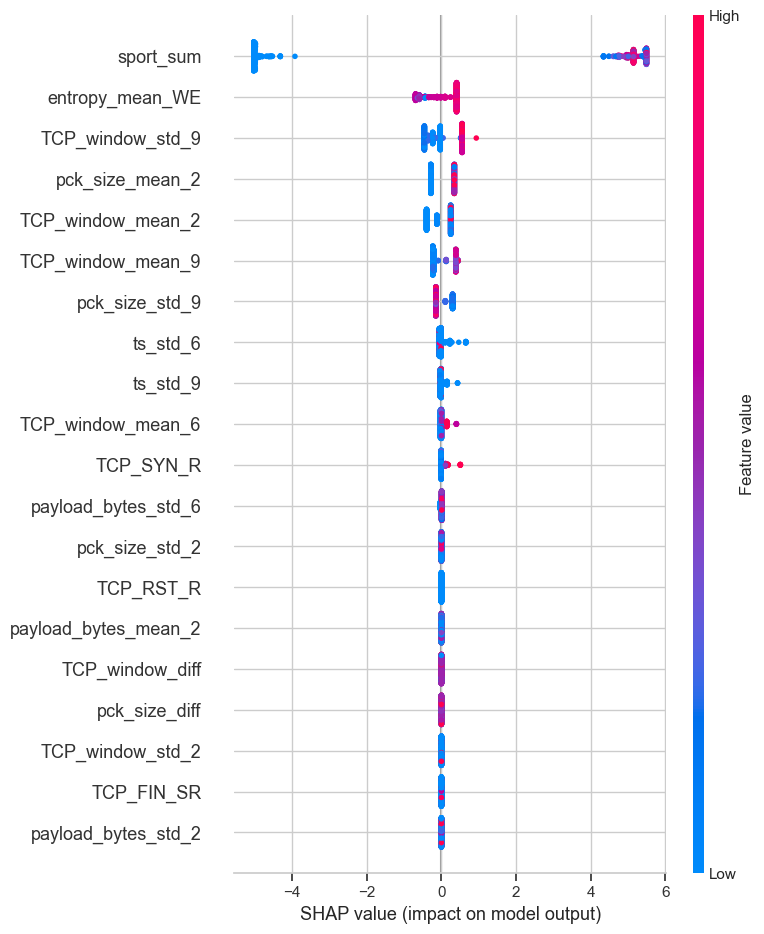

./INPUT/TEST/IoT_ENV_[OS_Service_Detection]Google_Home_Mini_SW.csv


 99%|===================| 19772/20000 [00:31<00:00]        

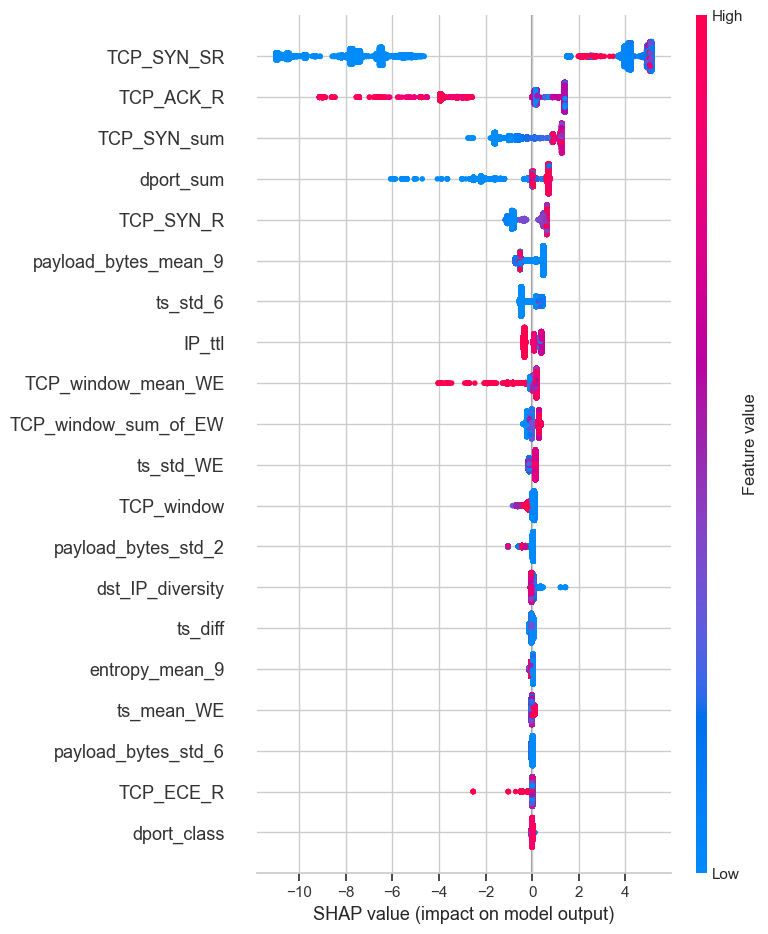

In [10]:
for csv in file_list:
    print(csv)
    cols=feature_list[file_list[csv][:-1]]
    df = pd.read_csv(csv,usecols=cols)#,header=None )
    df=df.fillna(0)
    X_train =df[df.columns[0:-1]]
    #X_train=np.array(X_train)
    df[df.columns[-1]] = df[df.columns[-1]].astype('category')
    y_train=df[df.columns[-1]].cat.codes  




    target_names=sorted(list(df[df.columns[-1]].unique()))

    target_names=["Benign",file_list[csv][:-1]]

    model =  xgboost.XGBClassifier()

    model.fit(X_train, y_train)
    explainer = shap.Explainer(model, X_train)
    try:shap_values = explainer(X_train)
    except:shap_values = explainer(X_train,check_additivity=False)
    shap.summary_plot(shap_values, X_train, show=False)
    plt.savefig(f'{file_list[csv]}.pdf', format='pdf', dpi=1200, bbox_inches='tight')
    plt.show()
